<a href="https://colab.research.google.com/github/MingyuKIM615/ITWILL_PYTHON/blob/master/py21__matplotilb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

라이브러리 임포트

In [ ]:
import numpy as np                # ndarray
import pandas as pd               # Series, DataFrame
import matplotlib.pyplot as plt   # 시각화(그래프)
import seaborn as sns             # 시각화, 예제 데이터셋

# 데이터 셋

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# `matplotlib.pyplot` 모듈을 사용한 시각화

1. `figure` 객체 생성
2. `figure` 객체에 `subplot`을 생성해서 추가
3. subplot에 그래프를 그림.
4. 그래프의 여러가지 옵션들을 설정.
5. 그래프 보여주기.

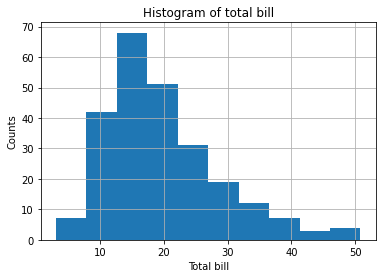

In [ ]:
# 1. figure 객체 생성
fig = plt.figure()
# 2. figure 객체에 subplot을 추가.
axis = fig.add_subplot(1, 1, 1) 
#> add_subplot(nows, ncols, index): nrow(행의 개수), ncols(열의 개수), index(subplot의 인덱스)
#> subplot의 인덱스는 1부터 시작

# 3. subplot에 그래프를 그림.
axis.hist(x=tips['total_bill']) # histogram(히스토그램)

# 4. 그래프 옵션 설정
axis.set_title('Histogram of total bill')
axis.set_xlabel('Total bill')
axis.set_ylabel('Counts')
axis.grid()

# 5. 그래프 보여주기
plt.show()

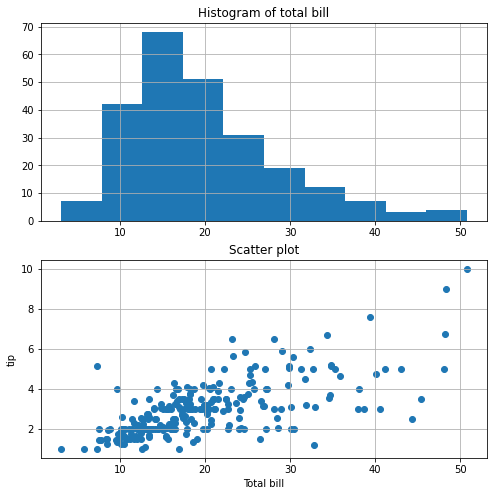

In [ ]:
# 1. figure 생성
fig = plt.figure(figsize=(8,8))

# 2. subplot을 추가
axis1 = fig.add_subplot(2, 1, 1)
axis2 = fig.add_subplot(212) # add_subplot(2,1,2)와 동일

# 3. 각각의 subplot에 그래프를 그림.
axis1.hist(x=tips['total_bill']) # 히스토그램
axis2.scatter(x=tips['total_bill'], y=tips['tip']) # 산점도 그래프

# 4. 그래프 옵션 설정
axis1.set_title('Histogram of total bill')
axis1.grid()
axis2.set_title('Scatter plot')
axis2.set_xlabel('Total bill')
axis2.set_ylabel('tip')
axis2.grid()

# 5. 그래프 보여주기
plt.show()

2개의 subplot을 좌/우로 배치해서 그래프 그리기

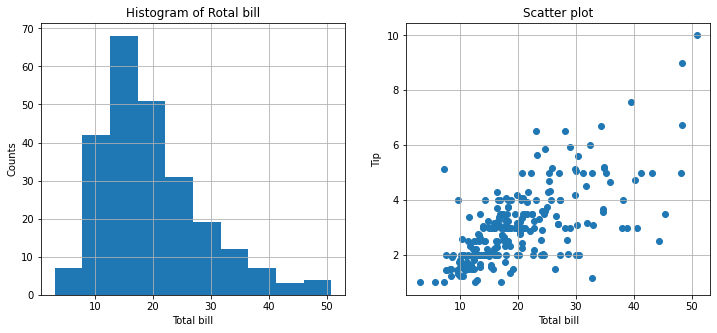

In [ ]:
fig = plt.figure(figsize=(12, 5))

axis1 = fig.add_subplot(1, 2, 1) # nrow=1, ncols=2, index=1
axis2 = fig.add_subplot(1, 2, 2) # nrow=1, ncols=2, index=2

axis1.hist(x=tips['total_bill']) # 히스토그램
axis2.scatter(x=tips['total_bill'], y=tips['tip']) # 산점도

axis1.set_title('Histogram of Rotal bill')
axis1.set_xlabel('Total bill')
axis1.set_ylabel('Counts')
axis1.grid()
axis2.set_title('Scatter plot')
axis2.set_xlabel('Total bill')
axis2.set_ylabel('Tip')
axis2.grid()

plt.show()

`plt.subplots()` : figure 객체 생성(`plt.figure()`) + subplot 추가

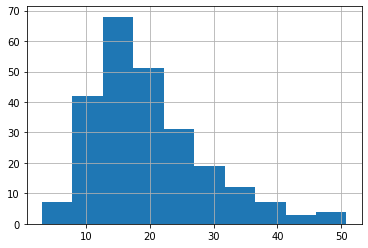

In [ ]:
# figure 객체 생성 + subplot 추가
fig, ax = plt.subplots()  # nrow=1, ncols=1
#> fig : Figure 클래스의 객체
#> ax : Subplot 객체 또는 Subplot 객체들의 리스트

# subplot에 그래프 그림.
ax.hist(x=tips['total_bill'])

# 그래프 옵션
ax.grid()

# 그래프 보여주기
plt.show()

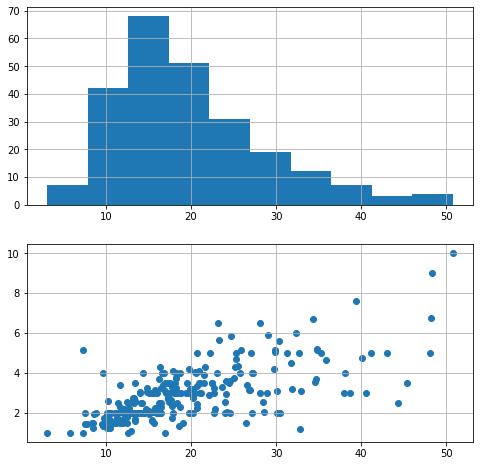

In [ ]:
# plt.subplots() 함수를 사용해서 상/하로 배치한 그래프 2개(hist, scatter)
fig, ax = plt.subplots(nrows=2, figsize=(8,8))

ax[0].hist(x=tips['total_bill'])
ax[1].scatter(x=tips['total_bill'], y=tips['tip'])

ax[0].grid()
ax[1].grid()

plt.show()

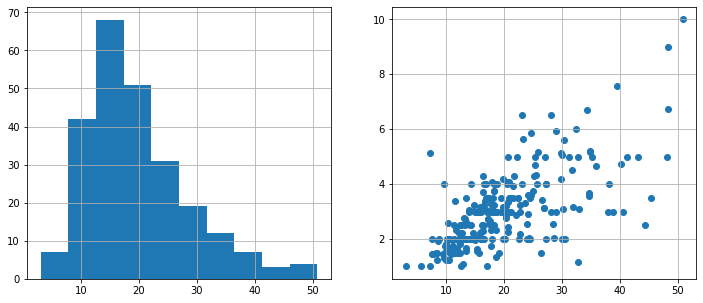

In [ ]:
# plt.subplots() 함수를 사용해서 좌/우로 배치한 그래프 2개(hist, scatter)
fig, ax = plt.subplots(ncols=2, figsize=(12,5))

ax[0].hist(x=tips['total_bill'])
ax[1].scatter(x=tips['total_bill'], y=tips['tip'])

ax[0].grid()
ax[1].grid()

plt.show()

Figure 객체에 1개의 subplot만 있는 경우에는 `matplotlib.pyplot` 모듈의 top-level 함수들(`plot, scatter, hist, ...`)을 사용해서 간단히 그래프를 그릴 수 있음.

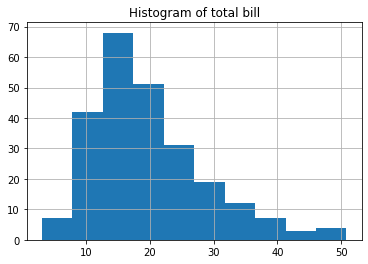

In [ ]:
# Figure 생성 + Figure에 1개의 subplot을 추가 + subplot에서 히스토그램 그림
plt.hist(x=tips['total_bill'])
         
# 옵션 설정
plt.title('Histogram of total bill')
plt.grid()

# 그래프 보여주기
plt.show()

# Box Plot

숫자 타입 변수의 기술 통계량(descriptive statistics)을 상자 모양으로 시각화

* 최솟값, 최댓값, 4분위값(25%, 중앙값, 75%)

In [ ]:
# tips 데이터프레임의 total_bill 변수(컬럼)의 기술 통계량
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

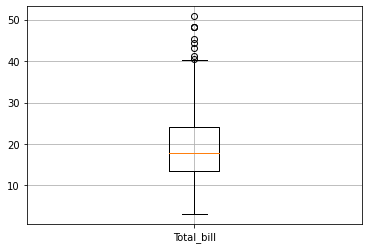

In [ ]:
plt.boxplot(x=tips['total_bill'], labels=['Total_bill'])
plt.grid()
plt.show()

In [ ]:
# IQR(inter-quartile range)박스 크기(75% - 25%)
iqr = 24.1275 - 13.3475
iqr

10.780000000000001

In [ ]:
upper_fence = 24.1275 + iqr * 1.5 # upper_fence = 75% + iqr * 1.5
upper_fence

40.2975

In [ ]:
lower_fence = 13.3575 - iqr * 1.5 # lower_fence = 25% - iqr * 1.5
lower_fence

-2.8125000000000018

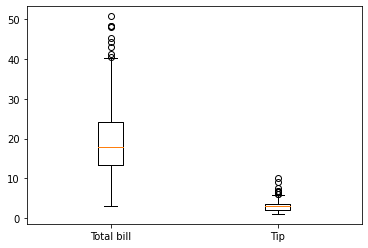

In [ ]:
# total_bill, tip의 box plot
plt.boxplot(x=[tips['total_bill'], tips['tip']], labels=['Total bill', 'Tip'])
plt.show()

성별 tip의 기술 통계량을 시각화 - 남성/여성 tip의 최솟값, 최댓값, 4분위수

In [ ]:
tips['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [ ]:
# 여성들의 tip
female_tip = tips[tips['sex'] == 'Female']['tip']

In [ ]:
# 남성들의 tip
male_tip = tips[tips['sex'] == 'Male']['tip']

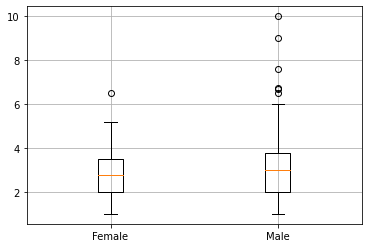

In [ ]:
plt.boxplot(x=np.array([female_tip, male_tip], dtype=object),
            labels=['Female', 'Male'])
plt.grid()
plt.show()

요일별 tip의 기술 통계량 시각화

In [ ]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
day_list=[]
day_list_tip =[]
for d in tips['day'].unique():
  day_list.append(d)
  day_list_tip.append(tips[tips['day']==d]['tip'])


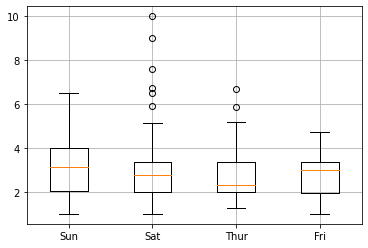

In [ ]:
plt.boxplot(x=np.array(day_list_tip, dtype=object), labels=day_list)
plt.grid()
plt.show()

# 히스토그램(Histogram)

연속형 자료를 구간으로 나눠서 구간 안에 포함된 자료의 수를 막대로 표현한 그래프

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


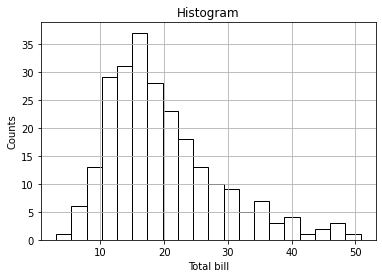

In [ ]:
# 영수증 금액의 히스토그램
plt.hist(x=tips['total_bill'], bins=20, edgecolor='black', color='white')
#> bins=막대 개수, 구간
#> color=막대를 채우는 색깔
#> edgecolor=막대 테두리 색깔
plt.title('Histogram')
plt.xlabel('Total bill')
plt.ylabel('Counts')
plt.grid()
plt.show()

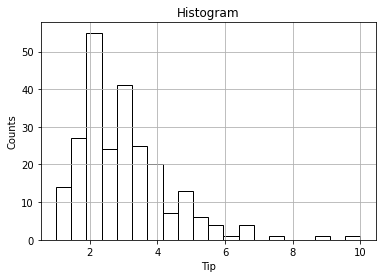

In [ ]:
# 팁의 히스토그램
plt.hist(x=tips['tip'], bins=20, edgecolor='black', color='white')
plt.title('Histogram')
plt.xlabel('Tip')
plt.ylabel('Counts')
plt.grid()
plt.show()

# 막대 그래프(Bar plot)

카테고리 타입 변수의 빈도수를 막대로 표현한 그래프

In [ ]:
# 성별 빈도수 - 남성/여성 숫자
gender_counts = tips['sex'].value_counts()
gender_counts #>pd.Series

Male      157
Female     87
Name: sex, dtype: int64

In [ ]:
gender_counts.index

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, dtype='category')

In [ ]:
gender_counts.values

array([157,  87])

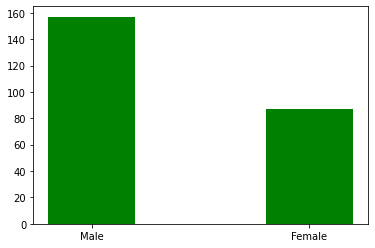

In [ ]:
plt.bar(x=gender_counts.index, height=gender_counts.values, width=0.4, color='green')
plt.show()

가로 막대 그래프(horizontal bar plot)

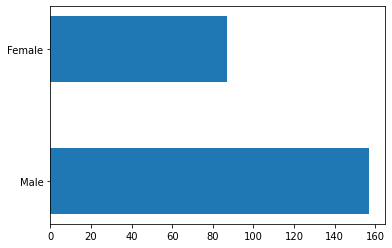

In [ ]:
plt.barh(y=gender_counts.index, width=gender_counts.values, height=0.5)
plt.show()

요일별 빈도수 세로/가로 막대 그래프

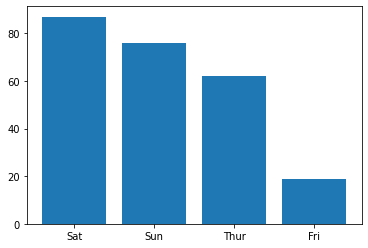

In [ ]:
# 요일 세로 막대 그래프
day_counts = tips['day'].value_counts()
plt.bar(x=day_counts.index, height=day_counts.values)
plt.show()

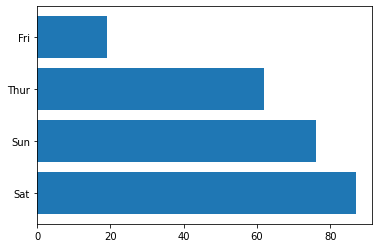

In [ ]:
# 요일 가로 막대 그래프
plt.barh(y=day_counts.index, width=day_counts.values)
plt.show()

size(테이블 손님수)별 빈도수 세로 막대 그래프

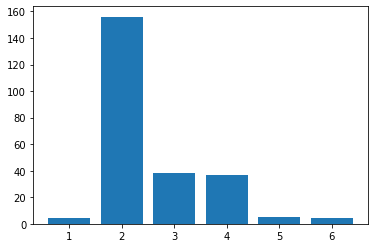

In [ ]:
# size별 빈도수 세로 막대 그래프
size_counts = tips['size'].value_counts()
size_counts
plt.bar(x=size_counts.index, height=size_counts.values)
plt.show()

# 산점도(Scatter plot)

두 변수 사이의 상관 관계를 파악하기 위해서 사용.

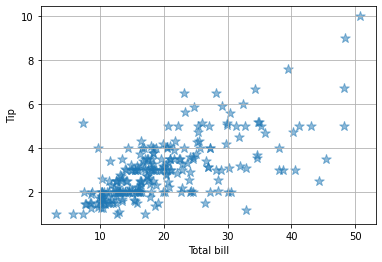

In [ ]:
# tip ~ total_bill 관계를 산점도로 시각화
plt.scatter(x=tips['total_bill'], y=tips['tip'],
            alpha=0.5, marker='*', s=100)
#> alpha=불투명도(0.0: 투명 ~ 1.0: 불투명)
#> marker=점의 모양(o, s, v, ^, +, *, ...)
#> s=점의 크기(size)
#> color=점의 색깔

plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.grid()

plt.show()

`tip ~ size` Scatter plot

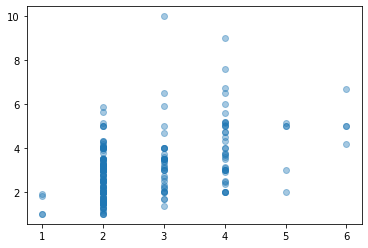

In [ ]:
plt.scatter(x=tips['size'], y=tips['tip'], alpha=0.4)
plt.show()

# 선그래프(Line plot)

In [ ]:
np.random.seed(1) # 난수 발생 순서를 고정
df = pd.DataFrame(data={'x1': np.arange(10),
                        'x2': np.random.rand(10)})
df

,x1,x2
0,0,0.417022
1,1,0.720324
2,2,0.000114
3,3,0.302333
4,4,0.146756
5,5,0.092339
6,6,0.186260
7,7,0.345561
8,8,0.396767
9,9,0.538817


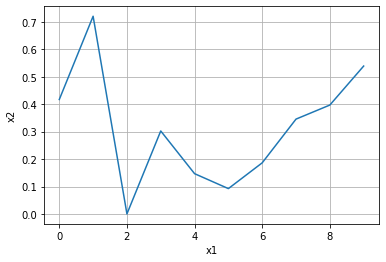

In [ ]:
# x2 ~ x1 line graph
plt.plot(df['x1'], df['x2'])

plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

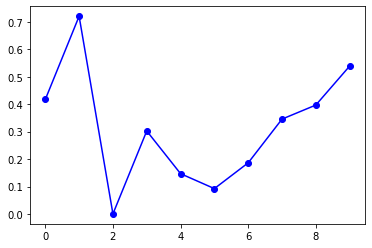

In [ ]:
plt.plot(df['x1'], df['x2'], 'bo-')
#> 'bo-' : format string(선 그래프의 형식을 지정한 문자열). color, marker, linestyle을 설정
#> color: 마커와 선의 색깔(r, g, b, k, ...)
#> marker: 마커(점) 모양(o, s, ^, ...)
#> linestyle : 선의 모양(-, --, :, ...), solid line ,dashed line, dotted line, ...
#> 선 그래프의 형식은 format string으로 지정할 수도 있고, variable-lenght keyword argument(**kwargs)로도 설정 가능.

plt.show()

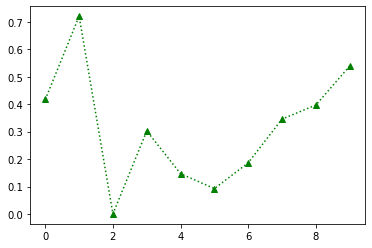

In [ ]:
# variable-length keyword argument를 사용한 선 그래프 모양 변경
plt.plot(df['x1'], df['x2'], 
         color='green', marker='^', linestyle='dotted') # linestyle=':'

plt.show()

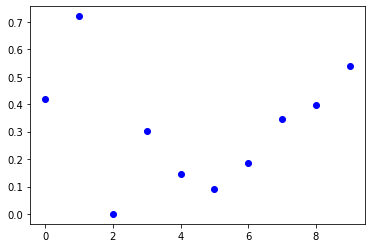

In [ ]:
# plot() 함수를 사용한 scatter plot - marker 적용. linestyle을 없앰.
plt.plot(df['x1'], df['x2'],'bo')
#> color='blue', marker='o', linestyle=''

plt.show()

하나의 plot에 여러개의 선 그래프를 함께 그리기

In [ ]:
np.random.seed(1)
df = pd.DataFrame(data={'x':np.arange(10),
                        'y1' : np.random.rand(10),
                        'y2' : np.random.rand(10),
                        'y3' : np.random.rand(10),})
df

,x,y1,y2,y3
0,0,0.417022,0.419195,0.800745
1,1,0.720324,0.685220,0.968262
2,2,0.000114,0.204452,0.313424
3,3,0.302333,0.878117,0.692323
4,4,0.146756,0.027388,0.876389
5,5,0.092339,0.670468,0.894607
6,6,0.186260,0.417305,0.085044
7,7,0.345561,0.558690,0.039055
8,8,0.396767,0.140387,0.169830
9,9,0.538817,0.198101,0.878143


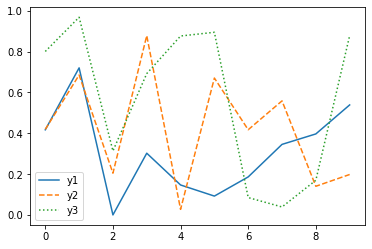

In [ ]:
# y1 ~ x
plt.plot(df['x'], df['y1'], label='y1', linestyle='solid') # linestyle='-'
# y2 ~ x
plt.plot(df['x'], df['y2'], label='y2', linestyle='dashed') # linestyle='--'
# y3 ~ x
plt.plot(df['x'], df['y3'], label='y3', linestyle='dotted') # linestyle=':'

plt.legend() # 각 plot의 label의 화면에 표시(범례)

plt.show()

# Exercises

## Ex 1.

* 4개의 Subplot을 2개 행, 2개 열에 배치.
* 4개의 Subplot에 성별 빈도수, 흡연여부 빈도수, 요일 빈도수, 시간 빈도수 그래프를 그리세요.

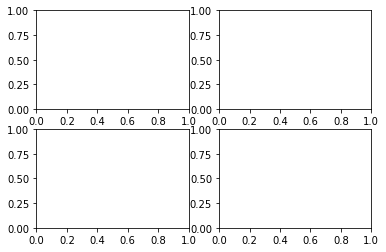

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.bar()

ax2 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax2 = fig.add_subplot(224)

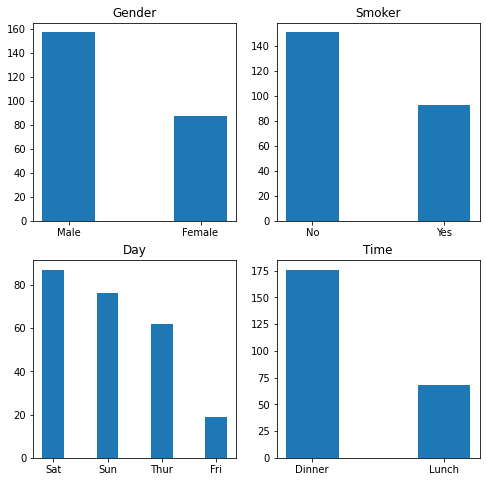

In [ ]:
# 성별, 흡연, 요일, 시간 빈도수 변수 설정하기
sex_counts = tips['sex'].value_counts()
somker_counts = tips['smoker'].value_counts()
day_counts = tips['day'].value_counts()
time_counts = tips['time'].value_counts()

# 그래프 그리기
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
ax[0][0].bar(x=sex_counts.index, height=sex_counts.values, width=0.4)
#> 2 차원 list 또는 2차원 ndarray에서 인덱스 사용 방법

ax[0, 1].bar(x=somker_counts.index, height=somker_counts.values, width=0.4)
#> 2차원 ndarray에서 인덱스 사용 방법

ax[1][0].bar(x=day_counts.index, height=day_counts.values, width=0.4)
ax[1][1].bar(x=time_counts.index, height=time_counts.values, width=0.4)

ax[0][0].set_title('Gender')
ax[0][1].set_title('Smoker')
ax[1][0].set_title('Day')
ax[1][1].set_title('Time')

plt.show()

## Ex 2.

* 성별로 점의 색깔이 다르게 표시되는 `tip ~ total_bill scatter plot`을 그리세요
* 범례 반드시 표시.

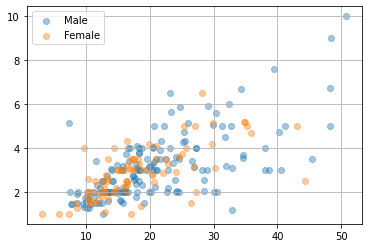

In [ ]:
# 남성 tip ~ total_bill scatter plot 
plt.scatter(x=tips[tips['sex']=='Male']['total_bill'], y=tips[tips['sex']=='Male']['tip'], label='Male',alpha=0.4)
# 여성 tip ~ total_bill scatter plot
plt.scatter(x=tips[tips['sex']=='Female']['total_bill'], y=tips[tips['sex']=='Female']['tip'], label='Female',alpha=0.4)

# 눈금선
plt.grid()

# 범례 만들기
plt.legend()

plt.show()

## Ex 3. 

* 요일별로 점의 색깔과 모양이 다르게 표시되는 `tip ~ total_bill scatter plot`을 그리세요
* 범례 반드시 표시

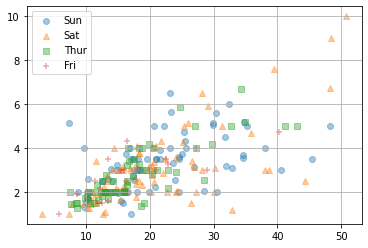

In [ ]:
# 요일 리스트 생성
day = tips['day'].unique()

# scatter plot에서 사용할 마커 종류들을 선언
makers = ['o', '^', 's', '+']

# 요일별 tip ~ total_bill scatter plot/ for 문을 이요해서 만들기
for d, m in zip(day, makers):
  date = tips[tips['day'] == d]
  plt.scatter(x=date['total_bill'], y=date['tip'], label=d, alpha=0.4, marker = m)

plt.grid()

plt.legend()

plt.show()


## Ex 4.

* seaborn 패키지의 iris 예제 데이터 셋을 DataFrame으로 생성.
* DataFrame의 구조 확인.
    * row 개수, column 개수/이름, 기술 통계량...
* `petal_width ~ petal_length` scatter plot 그리세요.
    * species 별로 점의 색깔이 다르게 표현. 범례 표시.

In [ ]:
# iris 예제 데이터 셋 DataFrame 생성
iris = sns.load_dataset('iris')

# 구조확인
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# species 리스트 생성
species = iris['species'].unique()

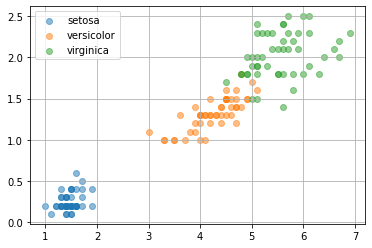

In [ ]:
# petal_width ~ petal_length scatter plot / for문 이용
for s in species:
  spec = iris[iris['species']==s]
  plt.scatter(x=spec['petal_length'], y=spec['petal_width'], label=s, alpha=0.5)

plt.grid()

plt.legend()

plt.show()